In [12]:
library(rstan)
library(here)
library(ggplot2)
library(bayesplot)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

file_beer_sales_2 <- read.csv(here("data", "3-2-1-beer-sales-2.csv"))
sample_size <- nrow(file_beer_sales_2)


This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [3]:
# 11度から30度まで気温を変化させて、その時の売上を予測する
temperature_pred <- 11:30


In [6]:
data_list_pred <- list(
  N = sample_size,
  sales = file_beer_sales_2$sales,
  temperature = file_beer_sales_2$temperature,
  N_pred = length(temperature_pred)
)


In [7]:
mcmc_result_pred <- stan(
  file = here("3部", "3-3-1-simple-lm-pred.stan"),
  data = data_list_pred,
  seed = 1
)


In [9]:
library(baysplot)
mcmc_sample_pred <- rstan::extract(mcmc_result_pred, permuted = FALSE)


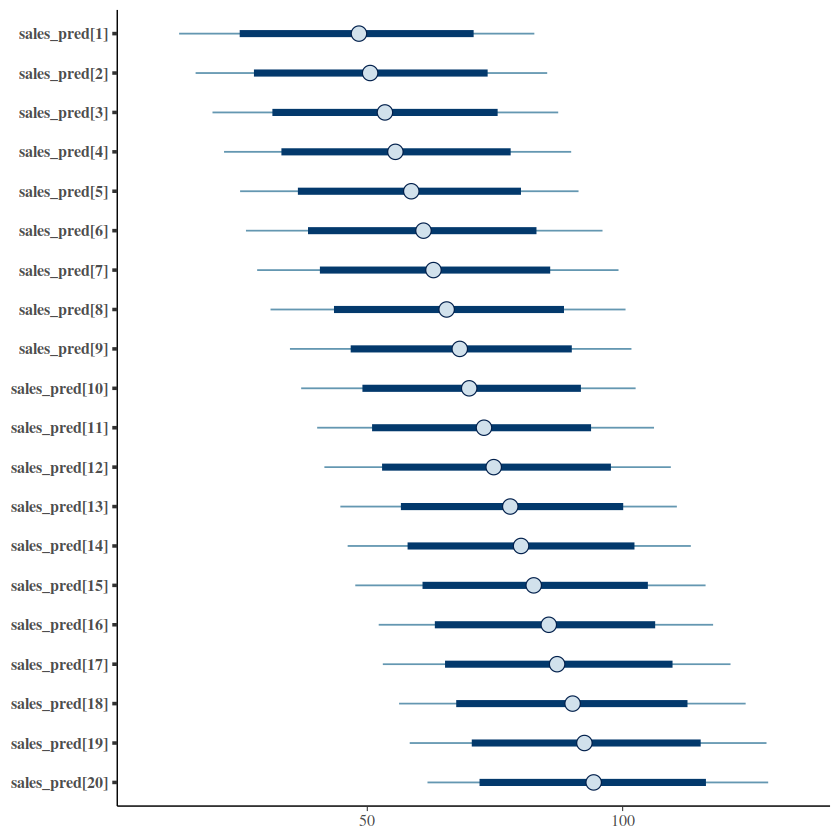

In [14]:
mcmc_intervals(
  mcmc_sample_pred,
  regex_pars = c("sales_pred"),
  prob = 0.8,
  prob_outer = 0.95
)


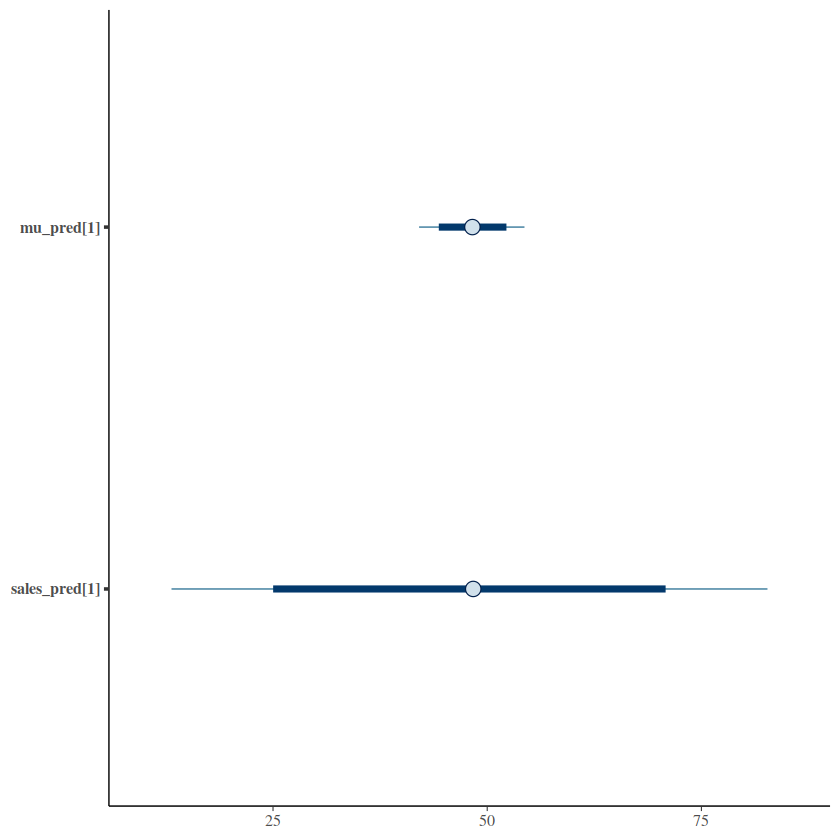

In [15]:
# 95%区間の比較
mcmc_intervals(
  mcmc_sample_pred,
  pars = c("mu_pred[1]", "sales_pred[1]"),
  prob = 0.8,
  prob_outer = 0.95
)


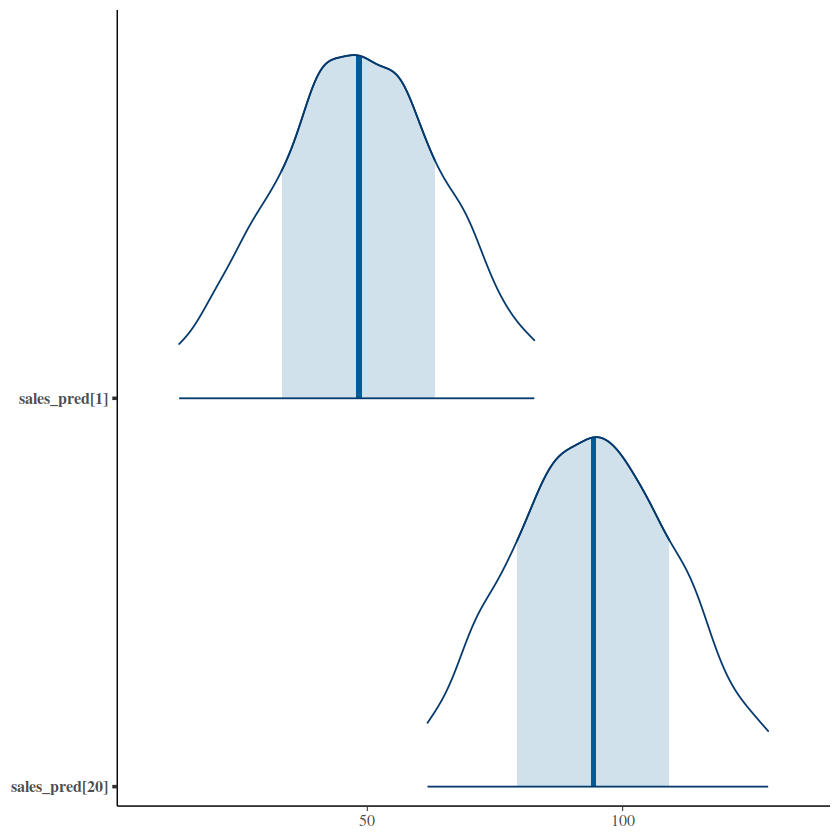

In [17]:
mcmc_areas(
  mcmc_sample_pred,
  pars = c("sales_pred[1]", "sales_pred[20]"),
  prob = 0.6, # 薄い青色で塗られた範囲
  prob_outer = 0.95
)
